#Normalizing 

The Business License process in the City of Chicago may require multiple license per business. To use the business license dataset as the population file for all businesses in Chicago will require pivoting the data so each idea 

In [67]:
import pandas as pd
#import pandasplus as pp

%matplotlib inline


In [34]:
taxpayer_df = pd.read_csv("/Users/matthewgee/research/chi-biz/data/Annual_Taxpayer_Location_Address_List-Chicago-2014 (1).csv")              
businesslc_df = pd.read_csv("/Users/matthewgee/research/chi-biz/data/Business_Licenses_-_Current_Active.csv")


In [35]:
taxpayer_df.columns


Index([u'Illinois Business Tax Number', u'Sequence Number', u'Type of Filer', u'SIC', u'Doing Busness As Name', u'Owning Entity', u'Address', u'Address Secondary', u'City', u'State', u'ZIP', u'Unnamed: 11'], dtype='object')

In [36]:
len(taxpayer_df)

54229

In [37]:
##Check for duplicates in taxpayer data
len(taxpayer_df.groupby('Illinois Business Tax Number').filter(lambda x: len(x)>1))

8765

In [38]:
businesslc_df.columns

Index([u'ID', u'LICENSE ID', u'ACCOUNT NUMBER', u'SITE NUMBER', u'LEGAL NAME', u'DOING BUSINESS AS NAME', u'ADDRESS', u'CITY', u'STATE', u'ZIP CODE', u'WARD', u'PRECINCT', u'POLICE DISTRICT', u'LICENSE CODE', u'LICENSE DESCRIPTION', u'LICENSE NUMBER', u'APPLICATION TYPE', u'APPLICATION CREATED DATE', u'APPLICATION REQUIREMENTS COMPLETE', u'PAYMENT DATE', u'CONDITIONAL APPROVAL', u'LICENSE TERM START DATE', u'LICENSE TERM EXPIRATION DATE', u'LICENSE APPROVED FOR ISSUANCE', u'DATE ISSUED', u'LICENSE STATUS', u'LICENSE STATUS CHANGE DATE', u'SSA', u'LATITUDE', u'LONGITUDE', u'LOCATION'], dtype='object')

In [39]:
#Check size of business licenses data
len(businesslc_df)

103718

In [40]:
#check duplicates in business licenses data
len(businesslc_df.groupby('ACCOUNT NUMBER').filter(lambda x: len(x)>1))

74307

In [41]:
businesslc_df.sort('ACCOUNT NUMBER').head()
pd.value_counts(businesslc_df['ACCOUNT NUMBER'])

147       445
63160     352
7551      316
63414     242
299710    187
8970      173
1896      172
11071     159
324325    131
63376     111
85325      98
65004      93
62544      88
89020      87
65465      86
...
316094    1
314045    1
311996    1
41648     1
395941    1
393892    1
385688    1
383583    1
363157    1
311932    1
39543     1
247719    1
45682     1
393828    1
393216    1
Length: 54003, dtype: int64

####Explore temporal patterns in license createion

In [42]:
businesslc_df.dtypes


ID                                    object
LICENSE ID                             int64
ACCOUNT NUMBER                         int64
SITE NUMBER                            int64
LEGAL NAME                            object
DOING BUSINESS AS NAME                object
ADDRESS                               object
CITY                                  object
STATE                                 object
ZIP CODE                              object
WARD                                 float64
PRECINCT                             float64
POLICE DISTRICT                      float64
LICENSE CODE                           int64
LICENSE DESCRIPTION                   object
LICENSE NUMBER                         int64
APPLICATION TYPE                      object
APPLICATION CREATED DATE              object
APPLICATION REQUIREMENTS COMPLETE     object
PAYMENT DATE                          object
CONDITIONAL APPROVAL                  object
LICENSE TERM START DATE               object
LICENSE TE

In [49]:
#convert datatimes strings to datatime types

def convert_datetimes(df, columnlist):
    
    for col in columnlist:
        df[col] = pd.to_datetime(df[col])    
    return df

businesslc_df = convert_datetimes(businesslc_df,['PAYMENT DATE','LICENSE TERM START DATE','LICENSE TERM EXPIRATION DATE','DATE ISSUED','APPLICATION CREATED DATE'])

In [51]:
businesslc_df.dtypes

ID                                           object
LICENSE ID                                    int64
ACCOUNT NUMBER                                int64
SITE NUMBER                                   int64
LEGAL NAME                                   object
DOING BUSINESS AS NAME                       object
ADDRESS                                      object
CITY                                         object
STATE                                        object
ZIP CODE                                     object
WARD                                        float64
PRECINCT                                    float64
POLICE DISTRICT                             float64
LICENSE CODE                                  int64
LICENSE DESCRIPTION                          object
LICENSE NUMBER                                int64
APPLICATION TYPE                             object
APPLICATION CREATED DATE             datetime64[ns]
APPLICATION REQUIREMENTS COMPLETE            object
PAYMENT DATE

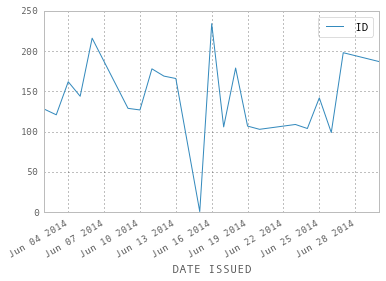

In [71]:
license_count = businesslc_df[['ID','DATE ISSUED']].groupby('DATE ISSUED').count()
license_count['06-2014'].plot()
#table = pd.pivot_table(businesslc_df, values='LICENSE NUMBER', index=['DATE ISSUED'], columns=['LICENSE CODE'], aggfunc=np.totals)

In [76]:
#make moving average 
average_weekly = license_count.resample('W')
average_monthly = license_count.resample('M')

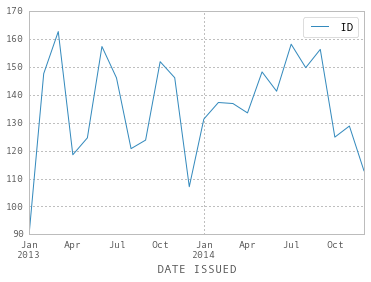

In [79]:
average_monthly['2013':'2014'].plot()

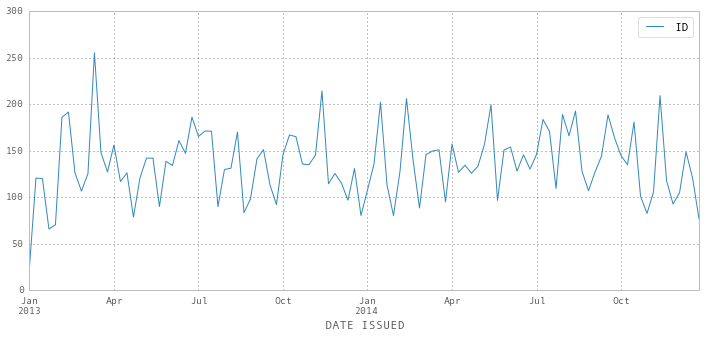

In [83]:
average_weekly['2013':'2014'].plot(figsize=(12,5))